In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(224).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image (61).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(173).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image(52).jpg
/kaggle/input/brain-tumor/Training/no_tumor/image (52).jpg
/kaggle/inp

In [2]:
#Need to import model first
import keras
from keras.models import Sequential

#Output layer which will tell the output
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
#once we created neural network, it will be dealing 
#Convert into single one d array by Flatten
#All processing will happen in DEnse layer
#Dropout layer to drop out extra features
#Max pooling layer works with conv2d layer

#For accuracy, we will use sklearn
from sklearn.metrics import accuracy_score





/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
#dealing with image data generator with 2 categories
#externally create 4 labels externally
import ipywidgets as widgets #for classification
import io
from PIL import Image #public image library
import tqdm

#divide the categories 
from sklearn.model_selection import train_test_split   #we have to import 
import cv2 
from sklearn.utils import shuffle  #train test split, shuffle for images

import tensorflow as tf

In [5]:
#Training part

X_train=[]
Y_train=[]

#specify image size
#scaling

image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
#We will shuffle all these images in this step
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

#3264 images, size 150/150, 3 channels RGB, tupple supplied by image

(3264, 150, 150, 3)

In [7]:
#Train test split
#get train and test functions, 4 things written by train testp split, i will say X_train, Y_train, test size 
#is 0.1%, random state is used(train test not biased)
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
#CNN

model = Sequential() #initialized as sequential
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3))) #add layers to column
#padding same as 3,3, paramter 
#64 images
model.add(Conv2D(64,(3,3),activation='relu')) #add function is adding  a layer, 32 parameters to be trained
#activation, m using RELU, input shape specification 3 is cause of channel, R first layer
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.3)) #extract not sueful features
#30% percent

#Maxpooling after dropout, letc add another output
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#Let us take 3 parameters now, in all three 128, padding 3*3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#change from 128 to 256
#9 max pooling
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
#Let us add more dense layers nad want dropout of all faeturs, output layer will be dense variable



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
#Now proceed with training part, compile the model
#we will be using binary loss, cross entropy loss

#Two values only so binary class
#loss will varie acc to model
#adam optimzer, #focus on accuracy

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
#model will take much more time, so i have taken 20 epochs
#validation split will continusly run with different splits


model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 330s 4s/step - loss: 1.9336 - accuracy: 0.3019 - val_loss: 1.3640 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 317s 4s/step - loss: 1.3569 - accuracy: 0.2928 - val_loss: 1.3891 - val_accuracy: 0.2891
Epoch 3/20
83/83 [==============================] - 317s 4s/step - loss: 1.3421 - accuracy: 0.3095 - val_loss: 1.4183 - val_accuracy: 0.3265
Epoch 4/20
83/83 [==============================] - 315s 4s/step - loss: 1.1793 - accuracy: 0.4809 - val_loss: 1.1019 - val_accuracy: 0.5408
Epoch 5/20
83/83 [==============================] - 317s 4s/step - loss: 0.9631 - accuracy: 0.5683 - val_loss: 0.9389 - val_accuracy: 0.5918
Epoch 6/20
83/83 [==============================] - 318s 4s/step - loss: 0.8377 - accuracy: 0.6523 - val_loss: 0.8109 - val_accuracy: 0.6259
Epoch 7/20
83/83 [==============================] - 314s 4s/step - loss: 0.6845 - accuracy: 0.7204 - val_loss: 0.6007 - val_accuracy: 0.7517
Epoch 8/20
83

In [16]:
#model.save(brain-tumor.h5)
import matplotlib.pyplot as plt
import seaborn as sns

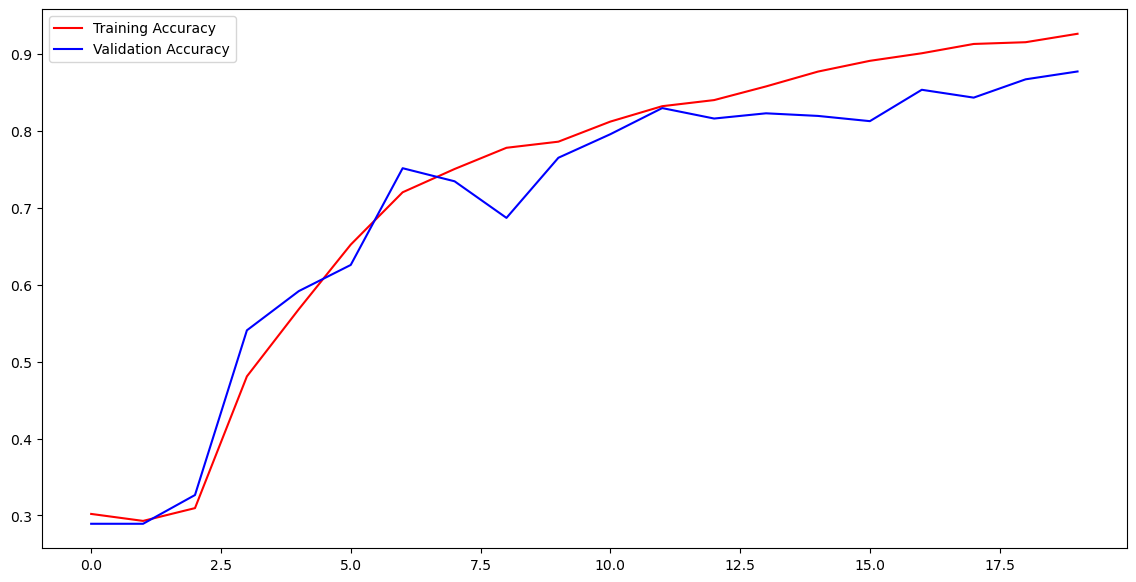

In [17]:
acc = history.history['accuracy'] #plot the accuracy with matplotlib
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7)) #plot with figure size, size 14 rows 7 columns
plt.plot(epochs,acc,'r',label="Training Accuracy") #plot epochs first then i want accuracy
plt.plot(epochs,val_acc,'b',label="Validation Accuracy") #validation accuracy
plt.legend(loc='upper left')
plt.show()

#accuracy continusly increasing, similary we can do for loss function as well

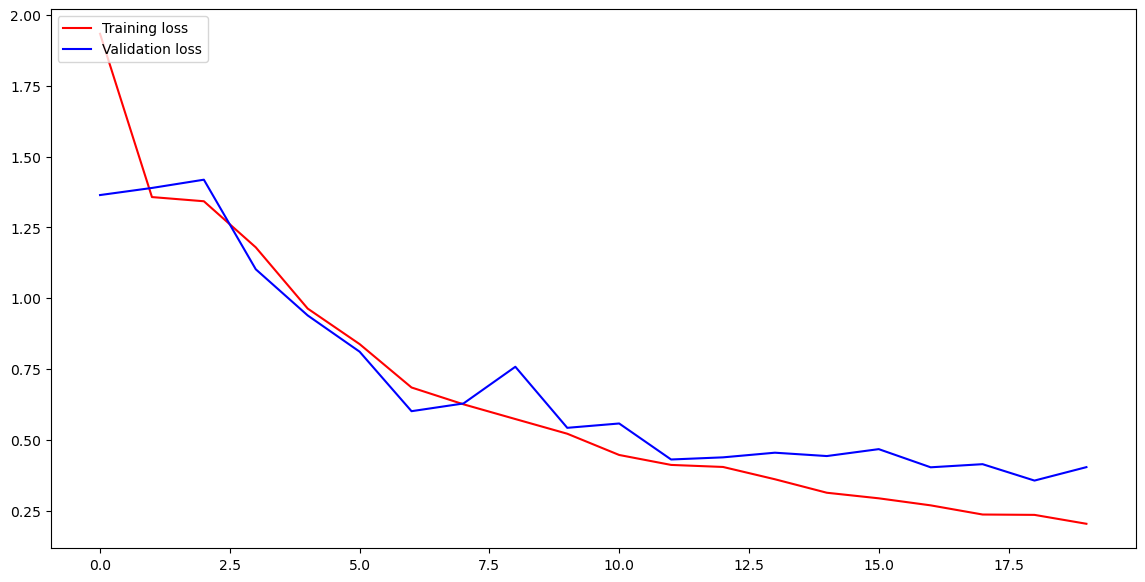

In [18]:
#validation loss is used here
#change accuracy to loss
#executed then....
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

#loss decrease in continus fashion


In [19]:
#Prediction for Images
#imread is reading the image from data

img = cv2.imread('/kaggle/input/brain-tumor/Training/glioma_tumor/gg (101).jpg')
img = cv2.resize(img,(150,150))#resize the image, size is 150,150
img_array = np.array(img) #convert image size into array
img_array.shape #reshape the array

(150, 150, 3)

In [20]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

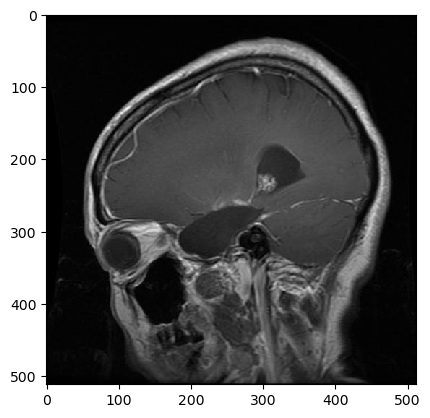

In [21]:
from tensorflow.keras.preprocessing import image

#load image function is used to load image from dataset
img = image.load_img('/kaggle/input/brain-tumor/Training/glioma_tumor/gg (101).jpg')
#show through image

plt.imshow(img,interpolation='nearest')
plt.show()

In [22]:
#let us check, this image is working or not ?
#take out maximum probability index
a=model.predict(img_array)

#argmax will return index of largest value, array of 4 numbers, what variabl out of these
#has higher prob//
#1 belongs to this tumor
indices = a.argmax()
indices

1/1 [==============================] - 0s 234ms/step


0